In [1]:
!pip install nltk
!pip install distance
!pip install fuzzywuzzy
!pip install scikit-learn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AbuBakar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv('train.csv/train.csv')

In [17]:
new_df = df.sample(30000,random_state=1337)

In [18]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
111062,111062,181994,181995,How can I invest in mutual funds in India from...,How do I invest in mutual funds in India?,0
300099,300099,80081,422846,How do you fix the SSL Connection Error on Goo...,How can I fix SSL connect error in MikTeX?,0
168537,168537,261040,261041,Can Magneto control light?,"Since Magneto is the master of magnetism, shou...",1
25864,25864,48184,48185,What is trending in bracelet fashion?,What is more fashionable: bracelets or rings?,0
244699,244699,357380,357381,What is the difference between PayScale salary...,What is the meaning of basic salary 5200-20200?,0


In [19]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')  
    
    # Decontracting words
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    return q
    

In [20]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [21]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [22]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head(10)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
111062,111062,181994,181995,how can i invest in mutual funds in india from...,how do i invest in mutual funds in india,0,55,40,11,9,7,18,0.39
300099,300099,80081,422846,how do you fix the ssl connection error on goo...,how can i fix ssl connect error in miktex,0,56,41,11,9,4,20,0.20
168537,168537,261040,261041,can magneto control light,since magneto is the master of magnetism shou...,1,25,80,4,16,3,20,0.15
25864,25864,48184,48185,what is trending in bracelet fashion,what is more fashionable bracelets or rings,0,36,44,6,8,2,14,0.14
244699,244699,357380,357381,what is the difference between payscale salary...,what is the meaning of basic salary 5200 20200,0,63,46,10,9,5,18,0.28
250194,250194,364005,364006,how can i get good marks in english in ibps exam,how do i build successful career in a sales job,0,48,47,11,10,3,20,0.15
200502,200502,302286,302287,my moto g2 has been restarting automatically a...,i am using a moto g2 do i need a screen guard...,0,198,58,43,16,9,48,0.19
158368,158368,247419,247420,what is a good corporate online travel service...,can i book a cab online for travelling to agra...,0,69,57,15,12,2,25,0.08
399692,399692,532987,100086,what is the venmo limit,is there a way to transfer funds between venmo...,0,23,57,5,11,2,16,0.12
31519,31519,37204,58105,what is the difference between 多少 and 几 in man...,what is the difference between 画 and 画画 in man...,0,59,59,11,11,9,22,0.41


In [23]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features


In [24]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"] = list(map(lambda x: x[0], token_features))
new_df["cwc_max"] = list(map(lambda x: x[1], token_features))
new_df["csc_min"] = list(map(lambda x: x[2], token_features))
new_df["csc_max"] = list(map(lambda x: x[3], token_features))
new_df["ctc_min"] = list(map(lambda x: x[4], token_features))
new_df["ctc_max"] = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"] = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [25]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
111062,111062,181994,181995,how can i invest in mutual funds in india from...,how do i invest in mutual funds in india,0,55,40,11,9,...,18,0.39,0.999975,0.799984,0.749981,0.599988,0.777769,0.636358,0,1
300099,300099,80081,422846,how do you fix the ssl connection error on goo...,how can i fix ssl connect error in miktex,0,56,41,11,9,...,20,0.20,0.599988,0.499992,0.249994,0.199996,0.444440,0.363633,0,1
168537,168537,261040,261041,can magneto control light,since magneto is the master of magnetism shou...,1,25,80,4,16,...,20,0.15,0.999967,0.428565,0.000000,0.000000,0.749981,0.199999,1,0
25864,25864,48184,48185,what is trending in bracelet fashion,what is more fashionable bracelets or rings,0,36,44,6,8,...,14,0.14,0.000000,0.000000,0.666644,0.499988,0.333328,0.285710,0,1
244699,244699,357380,357381,what is the difference between payscale salary...,what is the meaning of basic salary 5200 20200,0,63,46,10,9,...,18,0.28,0.499988,0.399992,0.749981,0.599988,0.555549,0.499995,0,1


In [26]:
import distance

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features
    

In [27]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [28]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
111062,111062,181994,181995,how can i invest in mutual funds in india from...,how do i invest in mutual funds in india,0,55,40,11,9,...,0.799984,0.749981,0.599988,0.777769,0.636358,0,1,2,10.0,0.829268
300099,300099,80081,422846,how do you fix the ssl connection error on goo...,how can i fix ssl connect error in miktex,0,56,41,11,9,...,0.499992,0.249994,0.199996,0.444440,0.363633,0,1,2,10.0,0.285714
168537,168537,261040,261041,can magneto control light,since magneto is the master of magnetism shou...,1,25,80,4,16,...,0.428565,0.000000,0.000000,0.749981,0.199999,1,0,11,9.5,0.615385
25864,25864,48184,48185,what is trending in bracelet fashion,what is more fashionable bracelets or rings,0,36,44,6,8,...,0.000000,0.666644,0.499988,0.333328,0.285710,0,1,1,6.5,0.243243
244699,244699,357380,357381,what is the difference between payscale salary...,what is the meaning of basic salary 5200 20200,0,63,46,10,9,...,0.399992,0.749981,0.599988,0.555549,0.499995,0,1,1,9.5,0.276596


In [29]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [30]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [31]:
print(new_df.shape)
new_df.head()

(30000, 28)


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
111062,111062,181994,181995,how can i invest in mutual funds in india from...,how do i invest in mutual funds in india,0,55,40,11,9,...,0.636358,0,1,2,10.0,0.829268,80,92,82,96
300099,300099,80081,422846,how do you fix the ssl connection error on goo...,how can i fix ssl connect error in miktex,0,56,41,11,9,...,0.363633,0,1,2,10.0,0.285714,64,68,60,64
168537,168537,261040,261041,can magneto control light,since magneto is the master of magnetism shou...,1,25,80,4,16,...,0.199999,1,0,11,9.5,0.615385,44,72,44,91
25864,25864,48184,48185,what is trending in bracelet fashion,what is more fashionable bracelets or rings,0,36,44,6,8,...,0.285710,0,1,1,6.5,0.243243,57,61,76,76
244699,244699,357380,357381,what is the difference between payscale salary...,what is the meaning of basic salary 5200 20200,0,63,46,10,9,...,0.499995,0,1,1,9.5,0.276596,51,57,51,69


In [32]:
# Using TSNE for Dimentionality reduction for 15 Features to 3 dimention

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = new_df['is_duplicate'].values

In [33]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
111062,how can i invest in mutual funds in india from...,how do i invest in mutual funds in india
300099,how do you fix the ssl connection error on goo...,how can i fix ssl connect error in miktex
168537,can magneto control light,since magneto is the master of magnetism shou...
25864,what is trending in bracelet fashion,what is more fashionable bracelets or rings
244699,what is the difference between payscale salary...,what is the meaning of basic salary 5200 20200


In [34]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 23)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
111062,0,55,40,11,9,7,18,0.39,0.999975,0.799984,...,0.636358,0,1,2,10.0,0.829268,80,92,82,96
300099,0,56,41,11,9,4,20,0.20,0.599988,0.499992,...,0.363633,0,1,2,10.0,0.285714,64,68,60,64
168537,1,25,80,4,16,3,20,0.15,0.999967,0.428565,...,0.199999,1,0,11,9.5,0.615385,44,72,44,91
25864,0,36,44,6,8,2,14,0.14,0.000000,0.000000,...,0.285710,0,1,1,6.5,0.243243,57,61,76,76
244699,0,63,46,10,9,5,18,0.28,0.499988,0.399992,...,0.499995,0,1,1,9.5,0.276596,51,57,51,69


In [35]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [36]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [37]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6023)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
111062,0,55,40,11,9,7,18,0.39,0.999975,0.799984,...,0,0,0,0,0,0,0,0,0,0
300099,0,56,41,11,9,4,20,0.20,0.599988,0.499992,...,0,0,0,0,0,0,0,0,0,0
168537,1,25,80,4,16,3,20,0.15,0.999967,0.428565,...,0,0,0,0,0,0,0,0,0,0
25864,0,36,44,6,8,2,14,0.14,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
244699,0,63,46,10,9,5,18,0.28,0.499988,0.399992,...,0,0,0,0,0,0,0,0,0,0


In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [56]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24000, 6022)
(24000,)
(6000, 6022)
(6000,)


In [57]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100)
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.7886666666666666

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
# for xgboost model
confusion_matrix(y_test,y_pred1)

array([[3113,  600],
       [ 668, 1619]], dtype=int64)

Accuracy: 0.7887
Precision: 0.7296
Recall: 0.7079
F1-Score: 0.7186
ROC AUC: 0.7732


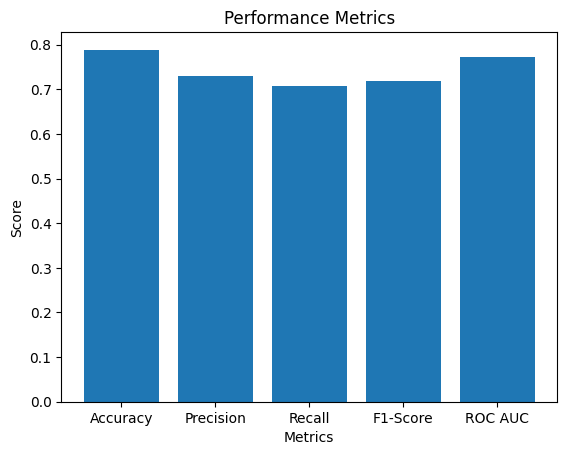

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Calculate the performance metrics
accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)
roc_auc = roc_auc_score(y_test, y_pred1)

# Display the performance metrics
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-Score: {:.4f}".format(f1))
print("ROC AUC: {:.4f}".format(roc_auc))

# Assuming metrics is a dictionary containing the performance metrics
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'ROC AUC': roc_auc
}

# Plotting a bar chart of performance metrics
plt.bar(metrics.keys(), metrics.values())
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Performance Metrics')
plt.show()


In [61]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [62]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [63]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features


In [64]:
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [65]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [66]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [67]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'

In [69]:
xgb.predict(query_point_creator(q1,q4))

array([0])